In [73]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.model_selection import train_test_split
from pydataset import data

import wrangle_mall

from sklearn.preprocessing import StandardScaler

Exercises

Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

    Clustering with the Iris Dataset

    Using this lesson as a guide, perform clustering on the iris dataset.
        Choose features other than the ones used in the lesson.
        Visualize the results of your clustering.
        Use the elbow method to visually select a good value for k.
        Repeat the clustering, this time with 3 different features.

    Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

    How does scaling impact the results of clustering?

    Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually. 

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# prepare from lesson

In [4]:
new_col_names = []

for col in df.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
df.columns = new_col_names

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
def split_data(df):
    train_validate, test = train_test_split(df, test_size=.2, random_state=51)
    train, validate = train_test_split(train_validate, test_size=.2, random_state=51)
    return train, validate, test

In [6]:
train, validate, test = split_data(df)

In [7]:
df.shape, train.shape

((150, 5), (96, 5))

In [8]:
#pick your poison

In [9]:
x = train[['sepal_length', 'sepal_width']]
x.head()

,sepal_length,sepal_width
64,6.1,2.9
117,6.5,3.0
33,5.2,4.1
7,4.6,3.4
50,5.0,3.3


In [10]:
#set hyperperameters
kmeans = KMeans(n_clusters=3)
#fit ONLY to train. computer may only learn from train
kmeans.fit(x)

#find predictions
clusters = kmeans.predict(x)
clusters

array([0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0,
       1, 0, 2, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 1,
       1, 0, 2, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1,
       2, 1, 0, 1, 2, 2, 2, 2], dtype=int32)

In [11]:
#Check it out
train['cluster'] = clusters
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
64,6.1,2.9,4.7,1.4,versicolor,0
117,6.5,3.0,5.5,1.8,virginica,2
33,5.2,4.1,1.5,0.1,setosa,1
7,4.6,3.4,1.4,0.3,setosa,1
50,5.0,3.3,1.4,0.2,setosa,1


In [12]:
list(train.groupby('species'));

In [13]:
#judge it
train.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,4.943750,3.406250,1.443750,0.225000,1.0
versicolor,5.925000,2.741667,4.238889,1.319444,0.5
virginica,6.507143,2.946429,5.450000,1.996429,1.5


[Text(0.5, 1.0, 'K-Means Clusters')]

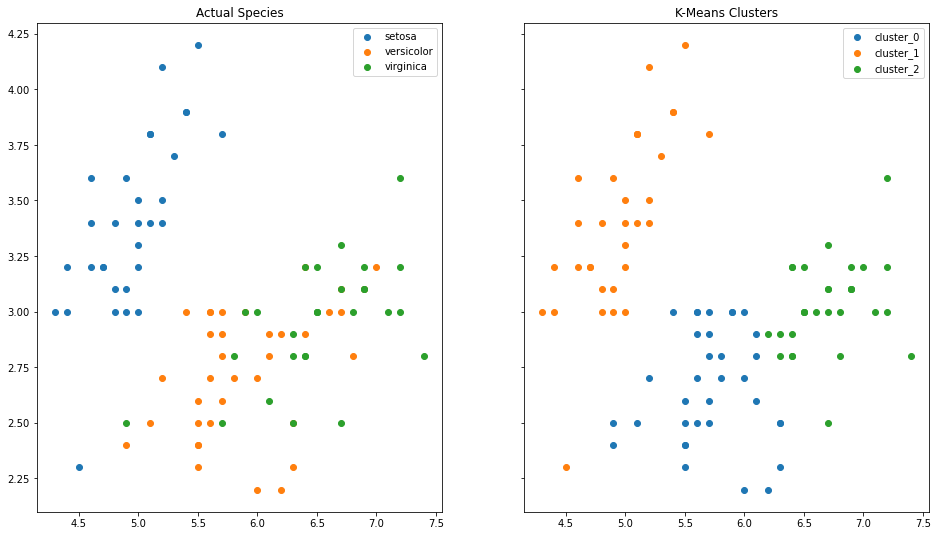

In [14]:
#               2 subplots,   set figsize      share x-axis   share y-axis
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)
#FOR 1st_item_in_tupple, 2nd_item_in_tupple IN list_of_tupples:
for species, subset in train.groupby('species'):
    #first plot (panda starts counting at '0')
    axs[0].scatter(subset.sepal_length, subset.sepal_width, label=species)

axs[0].legend()
axs[0].set(title='Actual Species')

# its a df, pandas already knows how to traverse df                   
for cluster_n in train.cluster.sort_values().unique():
    axs[1].scatter(train[train.cluster == cluster_n].sepal_length, train[train.cluster == cluster_n].sepal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

In [15]:
# the original data is on the right. 
#I think I will try more varaibles since the data is very intermingled
#and so not ideal for clustering




# Grader 
skip next 3 cells, They are for my edification

#### screenshot
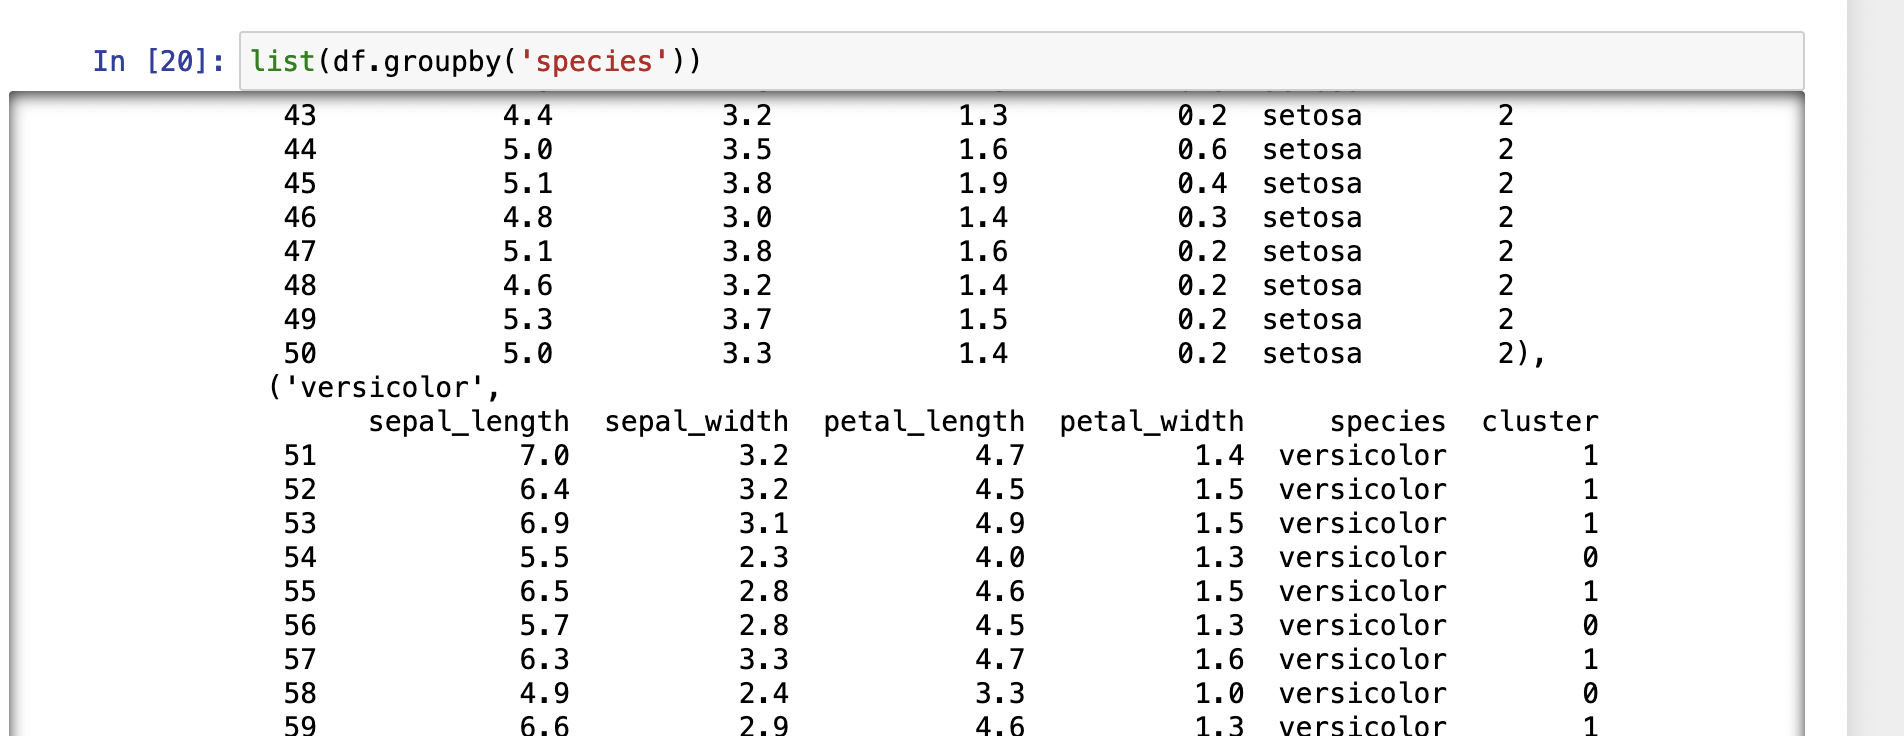

for species, subset in df.groupby('species'):
    axs[0].scatter(subset.sepal_length, subset.sepal_width, label=species

So what is happening here?

If you scroll up, you can see that list(df.groupby('species') results in a tupple. 
                                        
That tupple is in the form [('species', subset), ('species', subset), ('species', subset)]
                                        
Pandas already knows to go () to (), kinda like if DF it already knows to apply it row by row, or column by column etc
                                        
But if we want it to do something specifically to different parts of the tupple, we have to be more specific
                                        
NOTE: The different items in the tupple are separated by a comma.

Put it together!

for first_item_in_tupple, second_item_in_tupple in list_of_tupples
    Note: all we told axs so far is that there is two plots, pandas starts counting at zero
    axs[first_plot].
                                        
for species, subset in df.groupby('species'):
    axs[0].scatter(subset.sepal_length, subset.sepal_width, label=species

LEARNING TUPPLES!!!!!

# Return to Assignment

In [16]:
# Elbow method

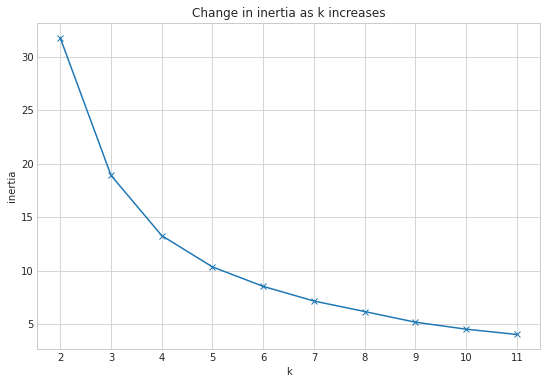

In [17]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(x).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Text(0.5, 1.0, 'Change in inertia as k increases')

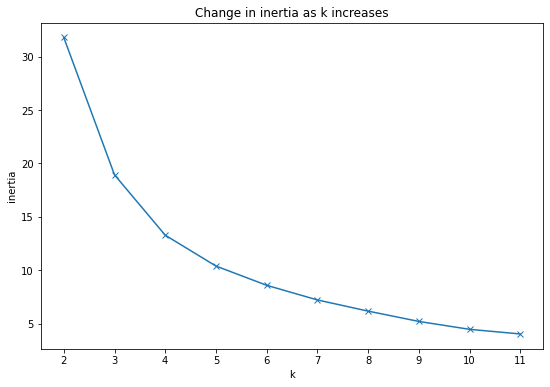

In [18]:
plt.figure(figsize=(9, 6))
pd.Series({k: KMeans(k).fit(x).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')

# Takeaway

I would pick 3 or 4. 
Based on domaing knowledge, I know the answer is 3

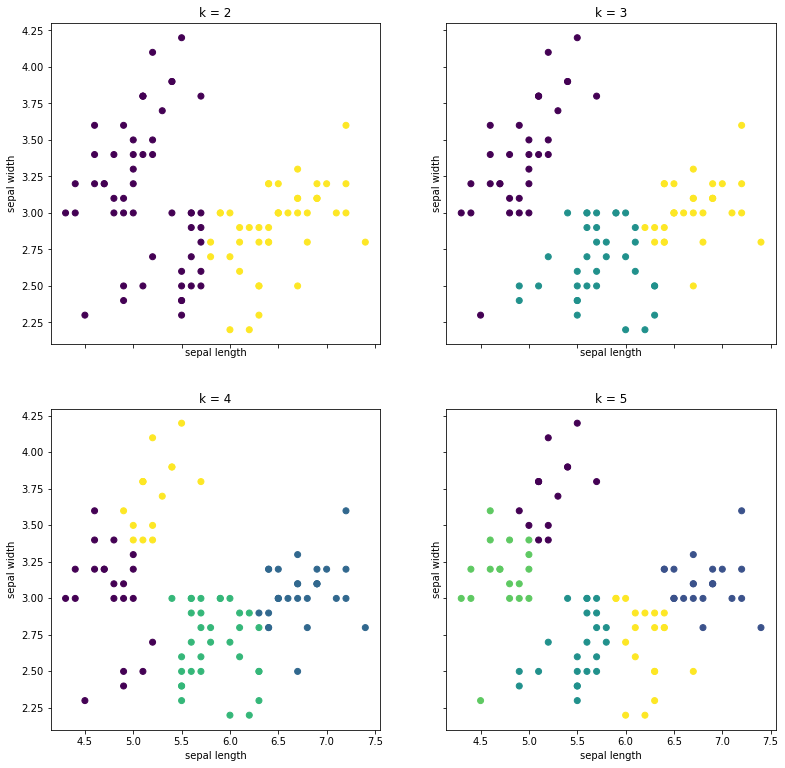

In [19]:
#               2 subplots,   set figsize      share x-axis   share y-axis
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

# for element1, element2 in zip(axes_subplot, range 2-6)
# note                          element1    , element2
for ax, k in zip(axs.ravel(), range(2, 6)):
    #         use kmeand to fit and predict x
    clusters = KMeans(k).fit(x).predict(x)
    #plot scatter plot
    ax.scatter(x.sepal_length, x.sepal_width, c=clusters)
    # labels             k is range 2-6 as defined in the 'for' statement
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='sepal width')

In [20]:
# explanation of what above code is

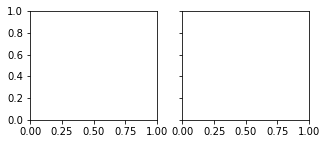

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2), sharex=True, sharey=True);

In [22]:
axs.ravel()

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [23]:
range(2, 4)

range(2, 4)

In [24]:
list(zip(axs.ravel(), range(2, 4)))

[(<AxesSubplot:>, 2), (<AxesSubplot:>, 3)]

# Repeat the clustering, this time with 3 different features.

In [25]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [26]:
# prepare from lesson

In [27]:
new_col_names = []

for col in df.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
df.columns = new_col_names

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [28]:
def split_data(df):
    train_validate, test = train_test_split(df, test_size=.2, random_state=51)
    train, validate = train_test_split(train_validate, test_size=.2, random_state=51)
    return train, validate, test

In [29]:
train, validate, test = split_data(df)

In [30]:
df.shape, train.shape

((150, 5), (96, 5))

In [31]:
#pick your poison

In [32]:
x = train[['sepal_length', 'sepal_width', 'petal_length']]
x.head()

,sepal_length,sepal_width,petal_length
64,6.1,2.9,4.7
117,6.5,3.0,5.5
33,5.2,4.1,1.5
7,4.6,3.4,1.4
50,5.0,3.3,1.4


In [33]:
#set hyperperameters
kmeans = KMeans(n_clusters=3)
#fit ONLY to train. computer may only learn from train
kmeans.fit(x)

#find predictions
clusters = kmeans.predict(x)
clusters

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2,
       0, 2, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 0, 0,
       0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1], dtype=int32)

In [34]:
#Check it out
train['cluster'] = clusters
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
64,6.1,2.9,4.7,1.4,versicolor,1
117,6.5,3.0,5.5,1.8,virginica,1
33,5.2,4.1,1.5,0.1,setosa,0
7,4.6,3.4,1.4,0.3,setosa,0
50,5.0,3.3,1.4,0.2,setosa,0


In [35]:
list(train.groupby('species'));

In [36]:
#judge it
train.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,4.943750,3.406250,1.443750,0.225000,0.000000
versicolor,5.925000,2.741667,4.238889,1.319444,1.722222
virginica,6.507143,2.946429,5.450000,1.996429,1.071429


[Text(0.5, 1.0, 'K-Means Clusters')]

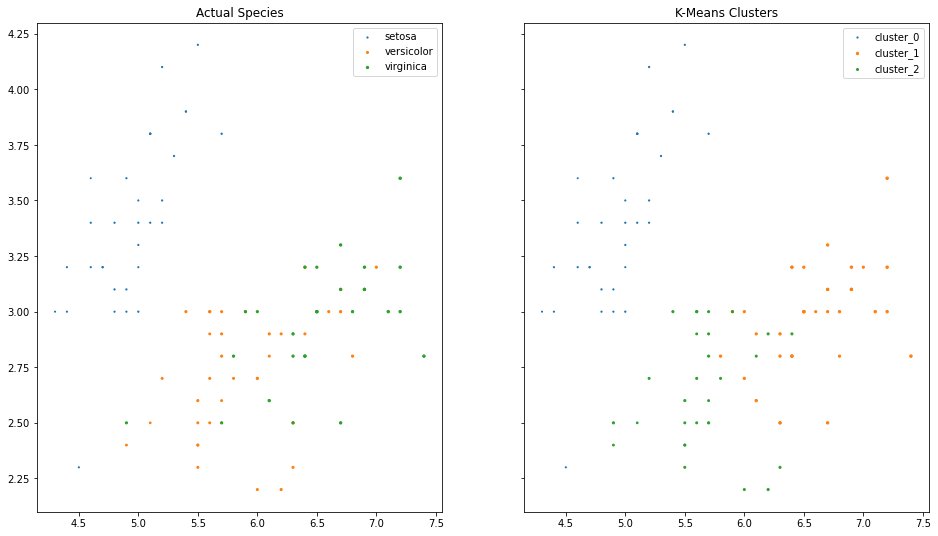

In [37]:
#               2 subplots,   set figsize      share x-axis   share y-axis
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)
#FOR 1st_item_in_tupple, 2nd_item_in_tupple IN list_of_tupples:
for species, subset in train.groupby('species'):
    #first plot (panda starts counting at '0')
    axs[0].scatter(subset.sepal_length, subset.sepal_width, subset.petal_length, label=species)

axs[0].legend()
axs[0].set(title='Actual Species')

# its a df, pandas already knows how to traverse df                   
for cluster_n in train.cluster.sort_values().unique():
    axs[1].scatter(train[train.cluster == cluster_n].sepal_length, train[train.cluster == cluster_n].sepal_width, train[train.cluster == cluster_n].petal_length, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

In [38]:
# it looks better than the 2-feature graphs




In [39]:
# Elbow method

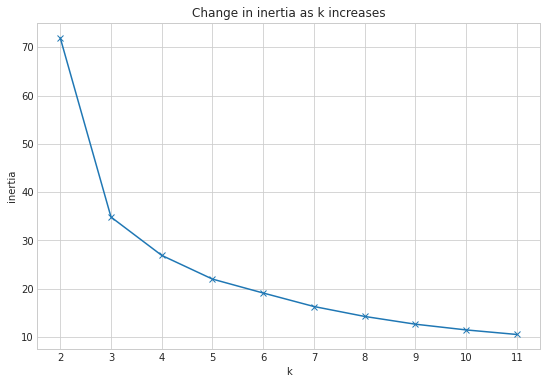

In [40]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(x).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# Takeaway

Definitely 3


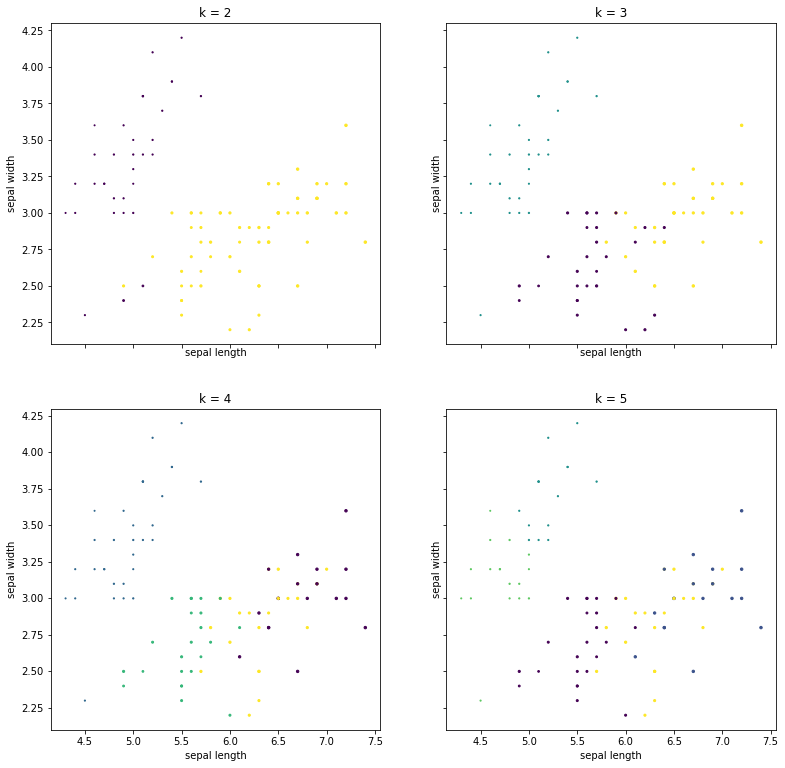

In [41]:
#               2 subplots,   set figsize      share x-axis   share y-axis
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

# for element1, element2 in zip(axes_subplot, range 2-6)
# note                          element1    , element2
for ax, k in zip(axs.ravel(), range(2, 6)):
    #         use kmeand to fit and predict x
    clusters = KMeans(k).fit(x).predict(x)
    #plot scatter plot
    ax.scatter(x.sepal_length, x.sepal_width, x.petal_length, c=clusters)
    # labels             k is range 2-6 as defined in the 'for' statement
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='sepal width')

# Takeaway

Definitely 3

# next
Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

# Repeat the clustering, this time with mall dataset.

In [42]:
df = wrangle_mall.get_mall_data()

In [43]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
df, train, validate, test = wrangle_mall.prep_mall_data(df)

In [45]:
df.head()

,customer_id,age,annual_income,spending_score,Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [46]:
df.shape, train.shape

((200, 5), (112, 5))

In [47]:
#pick your poison

In [48]:
x = train[['age', 'annual_income', 'Male']]
x.head()

,age,annual_income,Male
38,36,37,0
87,22,57,0
49,31,40,0
22,46,25,0
33,18,33,1


In [49]:
y = train.spending_score

In [50]:
#set hyperperameters
kmeans = KMeans(n_clusters=3)
#fit ONLY to train. computer may only learn from train
kmeans.fit(x)

#find predictions
clusters = kmeans.predict(x)
clusters

array([1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1,
       0, 2, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2,
       0, 2], dtype=int32)

In [51]:
#Check it out
train['cluster'] = clusters
train.head()

,customer_id,age,annual_income,spending_score,Male,cluster
38,39,36,37,26,0,1
87,88,22,57,55,0,0
49,50,31,40,42,0,1
22,23,46,25,5,0,1
33,34,18,33,92,1,1


In [64]:
list(train.groupby('spending_score'))

[(1,
       customer_id  age  annual_income  spending_score  Male  cluster
  158          159   34             78               1     1        0),
 (3,
     customer_id  age  annual_income  spending_score  Male  cluster
  8            9   64             19               3     1        1),
 (4,
      customer_id  age  annual_income  spending_score  Male  cluster
  30           31   60             30               4     1        2),
 (5,
       customer_id  age  annual_income  spending_score  Male  cluster
  22            23   46             25               5     0        1
  140          141   57             75               5     0        2
  134          135   20             73               5     1        0),
 (6,
     customer_id  age  annual_income  spending_score  Male  cluster
  2            3   20             16               6     0        1
  6            7   35             18               6     0        1),
 (7,
       customer_id  age  annual_income  spending_score  Male  

In [63]:
list(train.groupby('cluster'))

[(0,
       customer_id  age  annual_income  spending_score  Male  cluster
  87            88   22             57              55     0        0
  194          195   47            120              16     0        0
  189          190   36            103              85     0        0
  91            92   18             59              41     1        0
  164          165   50             85              26     1        0
  155          156   27             78              89     0        0
  187          188   28            101              68     1        0
  191          192   32            103              69     0        0
  139          140   35             74              72     0        0
  95            96   24             60              52     1        0
  157          158   30             78              78     0        0
  161          162   29             79              83     0        0
  137          138   32             73              73     1        0
  112          

In [65]:
train.head()

,customer_id,age,annual_income,spending_score,Male,cluster
38,39,36,37,26,0,1
87,88,22,57,55,0,0
49,50,31,40,42,0,1
22,23,46,25,5,0,1
33,34,18,33,92,1,1


[Text(0.5, 1.0, 'K-Means Clusters')]

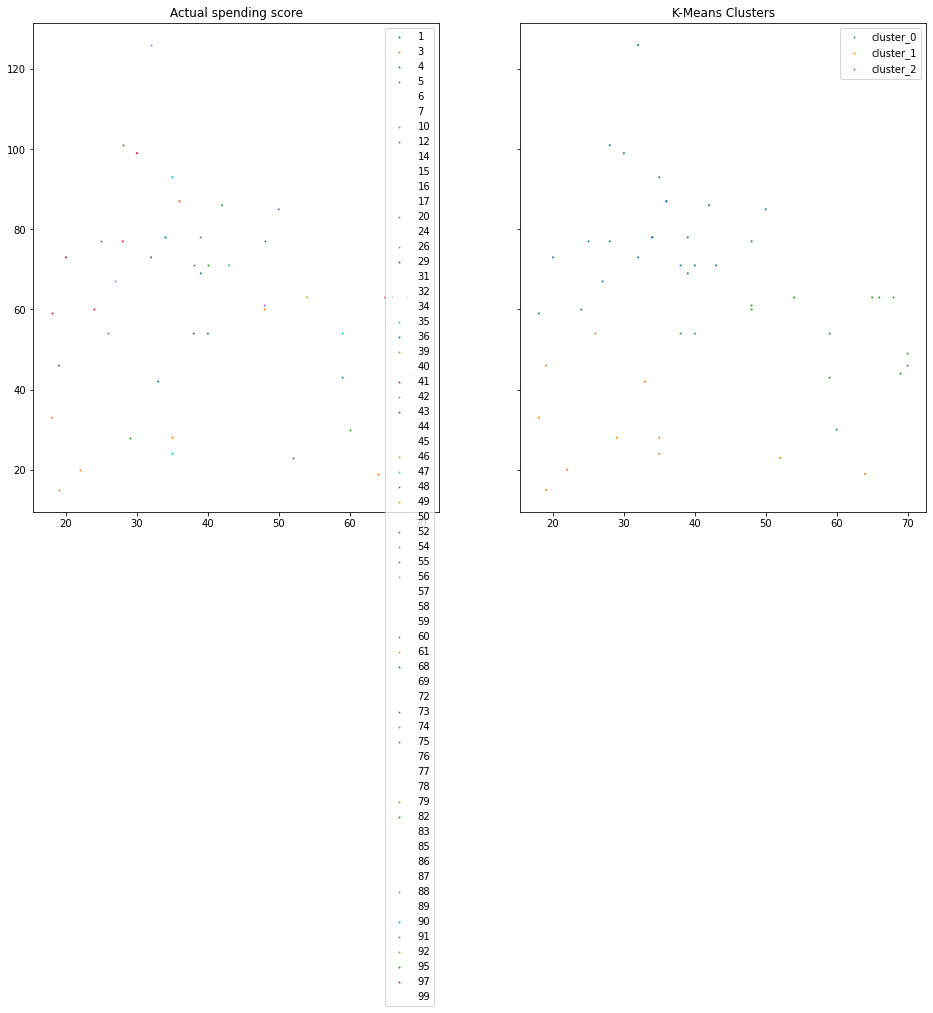

In [69]:
#               2 subplots,   set figsize      share x-axis   share y-axis
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)
#FOR 1st_item_in_tupple, 2nd_item_in_tupple IN list_of_tupples:
for spending_score, subset in train.groupby('spending_score'):
    #first plot (panda starts counting at '0')
    axs[0].scatter(subset.age, subset.annual_income, subset.Male, label = spending_score)

axs[0].legend()
axs[0].set(title='Actual spending score')

# its a df, pandas already knows how to traverse df                   
for cluster_n in train.cluster.sort_values().unique():
    axs[1].scatter(train[train.cluster == cluster_n].age, train[train.cluster == cluster_n].annual_income, train[train.cluster == cluster_n].Male, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

In [ ]:
# I can't see those tiny dots. In previous exercises we saw that gender didn't matter that much. So I'm tossing it. 



[Text(0.5, 1.0, 'K-Means Clusters')]

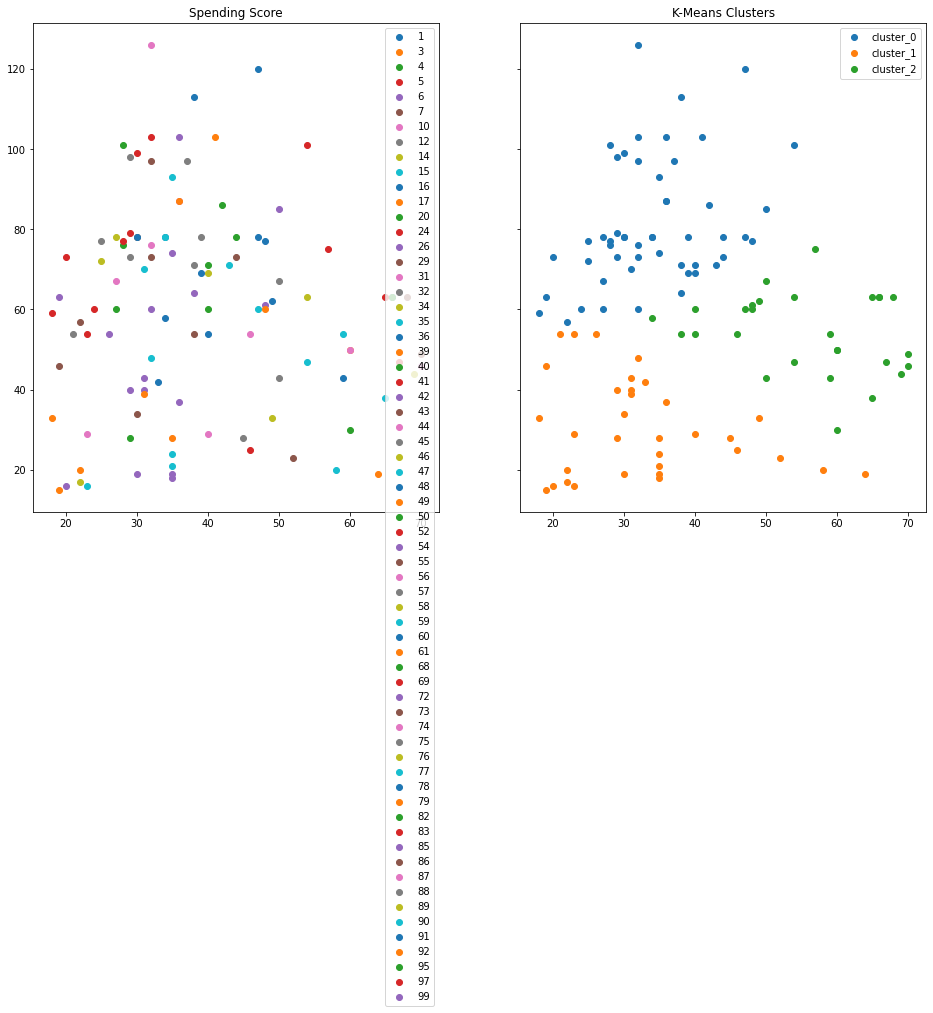

In [70]:
#               2 subplots,   set figsize      share x-axis   share y-axis
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)
#FOR 1st_item_in_tupple, 2nd_item_in_tupple IN list_of_tupples:
for spending_score, subset in train.groupby('spending_score'):
    #first plot (panda starts counting at '0')
    axs[0].scatter(subset.age, subset.annual_income, label = spending_score)

axs[0].legend()
axs[0].set(title='Spending Score')

# its a df, pandas already knows how to traverse df                   
for cluster_n in train.cluster.sort_values().unique():
    axs[1].scatter(train[train.cluster == cluster_n].age, train[train.cluster == cluster_n].annual_income, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

In [ ]:
# elbow method

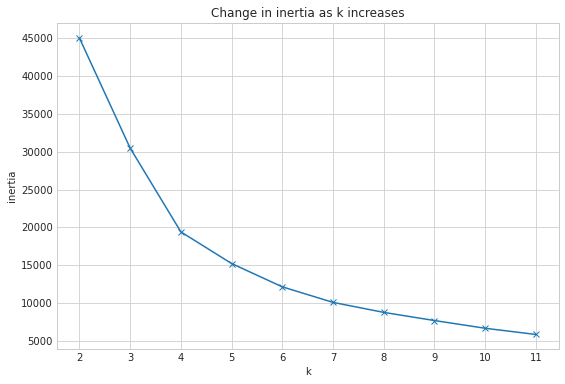

In [71]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(x).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# Takeaway is 4

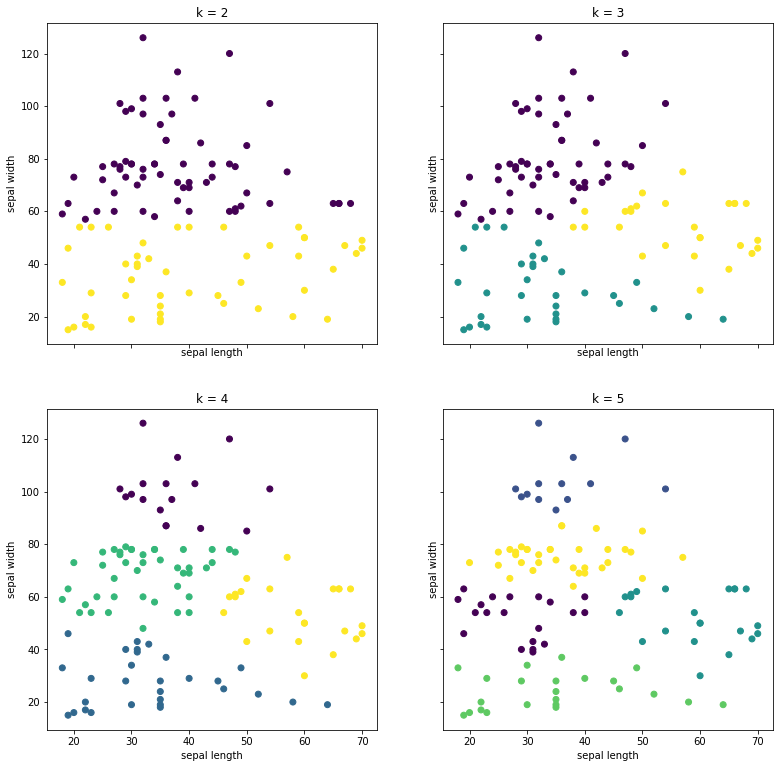

In [72]:
#               2 subplots,   set figsize      share x-axis   share y-axis
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

# for element1, element2 in zip(axes_subplot, range 2-6)
# note                          element1    , element2
for ax, k in zip(axs.ravel(), range(2, 6)):
    #         use kmeand to fit and predict x
    clusters = KMeans(k).fit(x).predict(x)
    #plot scatter plot
    ax.scatter(x.age, x.annual_income, c=clusters)
    # labels             k is range 2-6 as defined in the 'for' statement
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='sepal width')

# Repeat the clustering, this time with scaled mall features.

In [52]:
df = wrangle_mall.get_mall_data()

In [53]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [54]:
df, train, validate, test = wrangle_mall.prep_mall_data(df)

In [55]:
df.head()

,customer_id,age,annual_income,spending_score,Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [56]:
df.shape, train.shape

((200, 5), (112, 5))

In [57]:
#pick your poison

In [58]:
x = train[['age', 'annual_income', 'Male']]
x.head()

,age,annual_income,Male
38,36,37,0
87,22,57,0
49,31,40,0
22,46,25,0
33,18,33,1


In [59]:
y = train.spending_score

In [60]:
#set hyperperameters
kmeans = KMeans(n_clusters=3)
#fit ONLY to train. computer may only learn from train
kmeans.fit(x)

#find predictions
clusters = kmeans.predict(x)
clusters

array([1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1,
       0, 2, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 2,
       0, 2], dtype=int32)

In [61]:
#Check it out
train['cluster'] = clusters
train.head()

,customer_id,age,annual_income,spending_score,Male,cluster
38,39,36,37,26,0,1
87,88,22,57,55,0,0
49,50,31,40,42,0,1
22,23,46,25,5,0,1
33,34,18,33,92,1,1


# scale

In [74]:
#Define function to scale all data based on the train subset
def ss_scale_data(train, validate, test):
    
    ss_cols = ['age', 'annual_income']
    
    train_ss = train.copy()
    validate_ss = validate.copy()
    test_ss = test.copy()
    
    ss = StandardScaler()
    
    ss.fit(train[ss_cols])
    
    train_ss[ss_cols] = ss.transform(train[ss_cols])
    validate_ss[ss_cols] = ss.transform(validate[ss_cols])
    test_ss[ss_cols] = ss.transform(test[ss_cols])
    
    return train_ss, validate_ss, test_ss

In [75]:
train_ss, validate_ss, test_ss = ss_scale_data(train, validate, test)

In [76]:
train_ss.head()

,customer_id,age,annual_income,spending_score,Male,cluster
38,39,-0.220451,-0.888586,26,0,1
87,88,-1.246169,-0.099358,55,0,0
49,50,-0.586779,-0.770201,42,0,1
22,23,0.512205,-1.362122,5,0,1
33,34,-1.539231,-1.046431,92,1,1


In [78]:
train_ss.groupby('spending_score')

In [ ]:
# Find clusters

[Text(0.5, 1.0, 'K-Means Clusters')]

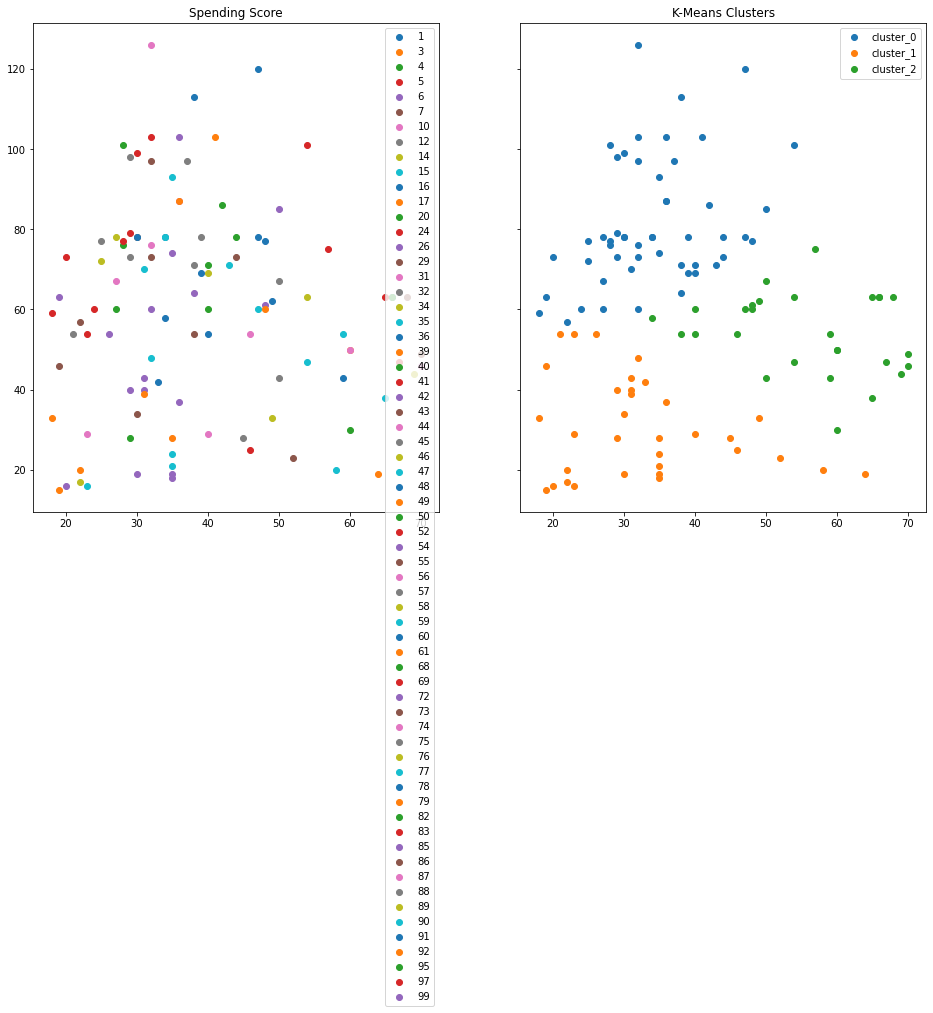

In [79]:
#               2 subplots,   set figsize      share x-axis   share y-axis
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)
#FOR 1st_item_in_tupple, 2nd_item_in_tupple IN list_of_tupples:
for spending_score, subset in train.groupby('spending_score'):
    #first plot (panda starts counting at '0')
    axs[0].scatter(subset.age, subset.annual_income, label = spending_score)

axs[0].legend()
axs[0].set(title='Spending Score')

# its a df, pandas already knows how to traverse df                   
for cluster_n in train.cluster.sort_values().unique():
    axs[1].scatter(train[train.cluster == cluster_n].age, train[train.cluster == cluster_n].annual_income, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

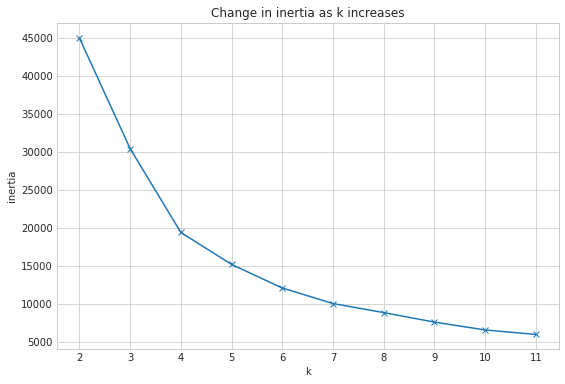

In [80]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(x).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# takeaway
still 4

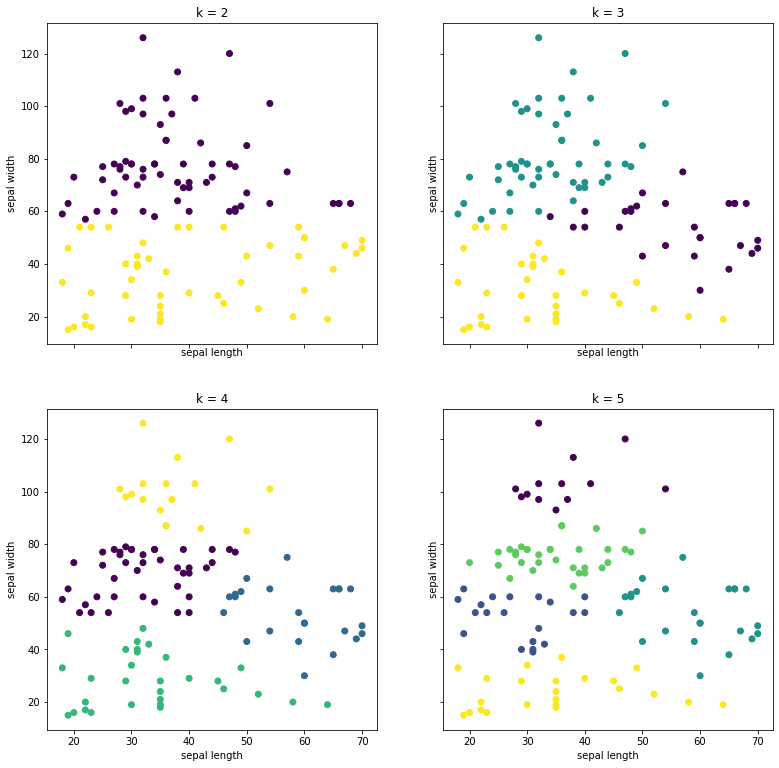

In [81]:
#               2 subplots,   set figsize      share x-axis   share y-axis
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

# for element1, element2 in zip(axes_subplot, range 2-6)
# note                          element1    , element2
for ax, k in zip(axs.ravel(), range(2, 6)):
    #         use kmeand to fit and predict x
    clusters = KMeans(k).fit(x).predict(x)
    #plot scatter plot
    ax.scatter(x.age, x.annual_income, c=clusters)
    # labels             k is range 2-6 as defined in the 'for' statement
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='sepal width')

# Takeaway
I kinda like 5 better now